___

# Exploratory Data Analysis and Classification of Given Dataset

___

## Table of Contents

[Problem Statement](#section1)<br>

1. [Importing libraries](#section2)<br>
2. [Importing the Dataset](#section3)<br/>
3. [Data Description](#section4)
4. [Data Profiling](#section5)
    - 4.1 [Understanding the Dataset](#section401)<br/>
    - 4.2 [Data Preprocessing](#section402)<br/>
    - 4.3 [Questions about the data](#section403)<br/>
    - 4.4 [Feature Engineering](#section404)<br/><br/>
5. [Separating Data into Test and Train Splits](#section6)
6. [Model Training and Evaluation](#section7)<br/> 
    - 6.1 [Random Forest Classifier](#section701)<br/>
    - 6.2 [SVM Kernal Classifier](#section702)<br/>
    - 6.3 [Deep Learning Classifier](#section703)<br/>
    - 6.4 [XG Boost Classifier](#section704)<br/><br/>
7. [Model Selection](#section8)<br/>
8. [Conclusion](#section8)<br/>

   

<a id='section1'></a>
## Problem Statement

In this notebook, our primary objective is to create a classification model for the given dataset which contains information about users. 
- The first objective of this notebook would be to understand the data slightly more in depth. We will perform an initial EDA on this data to understand it. 
- After this we will then manipulate this data to get it into a format that can be understood by our ML and DL models. 
- Lastly, we will apply a few different models on this data and assess the performance of each of these models. The model with the best performance metrics is then chosen and we explore these models with the help of shapely values and SHAP.

___

<a id='section2'></a>
## 1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
import shap
shap.initjs()
from sklearn.utils import resample
import pickle

__The above code simply imports the libraries that we will require in order to process, explore and finally evaluate our model. We will be importing more libraries as we need them throughout the notebook__

___

<a id='section3'></a>
## 2. Importing the Dataset

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/geniusai-research/interns_task/main/taskdata.csv')
data.head()

HTTPError: HTTP Error 404: Not Found

We import our dataset from GitHub and save it to the variable __'data'__ as a DataFrame object using pandas.

___

<a id='section4'></a>
## 3. Data Description

- The dataset consists of the information about customers. We use this data to explore patterns as well as train a classification model to be able to predict whether a user stays or leaves.
- The dataset comprises of __4407 observations of 17 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| user_id           | ID of the user                                                 | 
| account_id      | Users account ID                        |  
| max_return_days        | Maximum number of days in which user made a re-purchase                                           | 
| average_return_days          | Average number of days in which user made a purchase                                         |   
| customer_since_months            | No of months since user started paying                                          |
| total_revenue           |     Total revenue made from this user                                    |
| average_revenue         | Average revenue made from this user |
| avg_vas_count         | Average amount of vas counts|
| avg_used_vas_value        | Average number of vas used by the user                                             |
| business_type          | Type of business                                           |
| avg_wallet_bonus           | Average bonus amount in wallet                                                 | 
| avg_active_ads      | Average no of active ads                        |  
| avg_new_ads        | Average no of new ads                                           | 
| avg_email_replies          | Average no of email replies                                         |   
| avg_call_replies            | Average no of call replies                                         |
| avg_sms_replies           |     Average no of sms replies                                    |
| target         | Boolean that decides if user stays or leaves |

___

<a id='section5'></a>
## 4. Data Profiling

<a id='section501'></a>
### 4.1 Understanding the Dataset

In [ ]:
data.info()

In [ ]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

- As we can see, there are __7__ null values in the account_id column. In other circumstances we could have found a way to impute values where they were missing but since this column is an ID value, there is no logical way to fill these rows.

- Since there seem to only be __7__ of these values missing, we can drop the entire row wherever these values are missing.

In [ ]:
data.describe()

___

<a id='section502'></a>
### 4.2 Data Preprocessing

__Dropping all null values__

In [ ]:
data = data.dropna()

In [ ]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

- Now that we have dropped all the null values, we can see that there is no more missing data in our DataFrame.

__Dropping all duplicates__

In [ ]:
data = data.drop_duplicates()
data.info()

It seems as though there were no duplicate values in our dataset since we have the same number of rows before and after the operation.

In [ ]:
data.groupby('target').size()

- When we check the distribution of our data based on the target variable, we see that there is a large imbalance in our data.
- There are __3946 instances of target class 0__ and only __454 instances of class 1__. This is an imbalanced dataset and could effect the performance of our models down the line. 
- This is because we will have a severely skewed dataset and there would be vastly different misclassification costs based on the class of the row.
- To overcome this issue, we will use a method called upsampling. We will sample from the instances from the minority class(class 1) and create more instances of it and add these new instances to our DataFrame.

In [ ]:
df_majority = data[data.target==0]
df_minority = data[data.target==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3946,    # to match majority class
                                 random_state=123) # reproducible results
data = pd.concat([df_majority, df_minority_upsampled])
data.target.value_counts()

- To do this, we use the resample method that we imported in the beginning. Now we can see that we have the same number of both instances. This makes our dataset more balanced and will avoid unecessary skewing.
- When we do this, we will have duplicate rows since we are resampling from the rows we already have and we will have to reset our indices so that they are in ascending order without repitition like they were when we started off.

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.drop(['index'],axis=1)

- After sucessfully resetting our indices, we can continue to explore the new, upsampled dataset.
- As we see, we now have __7892 rows__ in our upsampled dataset.

__Upsampled Dataset Exploration__

In [ ]:
data.head()

In [ ]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

__Correlation of Features__

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True)

- From the first glance of the above heatmap, we can see that there are certain features that are highly correlated with eachother and would cause multicolinearity if kept together during training.
- These columns are as follows:
     1. Total revenue and Average Revenue
     2. Average email replies and average call replies
     3. Average VAS count and average used vas value
- From these 3 pairs, one feature each can be dropped but we will not drop them immediately, we will still perform some EDA with these features as they could still provide us with some useful information.

In [ ]:
data.head()

- From the above heatmap, we can straight away see some features that are strongly correlated. We will explore these correlations in a little more detail now.
- For obvious reasons, we will discount correlations such as average_revenue and total_revenue. These will inevitably be highly correlated since they are functions of the same value (revenue).

<a id='section503'></a>
### 4.3 Questions about the data

#### 4.3.1 How are the average e-mail replies and average call replies correlated and what is the distribution of these with respect to business type?

In [ ]:
sns.lmplot(x='avg_call_replies', y='avg_email_replies', hue='business_type',
           data=data, 
           fit_reg=False)

- From the graph above, we can see that average call replies and average email replies are strongly, positively correlated as we saw in our heatmap. 
- This means that if a user has a high average number of email replies, there is a very good chance they also have a high number of call replies and vice versa.
- We also see that most outliers on the upper bound are of the type __business_type=0__.

#### 4.3.2 How are the average e-mail replies and average sms replies correlated and what is the distribution of these with respect to business type?

In [ ]:
sns.lmplot(x='avg_sms_replies', y='avg_email_replies', hue='business_type',
           data=data, 
           fit_reg=False)

- As we can see from the above graph, the average email replies and average sms replies are also positively correlated though not as strongly as email replies and call replies.
- This means that if a user has a high average number of email replies, there is a good chance they also have a high number of sms replies and vice versa.
- Similar to our previous graph, most of the outliers in the upper bound belong to __business_type=0__.

#### 4.3.3 How are the average call replies and average sms replies correlated and what is the distribution of these with respect to business type?

In [ ]:
sns.lmplot(x='avg_sms_replies', y='avg_call_replies',hue='business_type',
           data=data, x_jitter=.8, y_jitter=.8,
           fit_reg=False)

- Once again there is a distinct positive correlation between the 2 and the outliers are of type __business_type=0__.
- This means that if a user has a high average number of sms replies, there is a very good chance they also have a high number of call replies and vice versa.

#### 4.3.4 How is the target variable correlated with the other features?

In [ ]:
data_corr = data.corr()
data_corr[-1:].transpose()

- There don't seem to be many features that are strongly positively or negatively correlated with our target variable. __max_return_days__ seems to have a very slightly positive correlation but it isn't strong enough for us to be able to make assumptions.
- __customer_since_months__ also seems to be slightly correlated with our target variable but negatively.

#### 4.3.5 How does the target variable differ with customer_since_months?

In [ ]:
sns.barplot(x='target',y='customer_since_months',data=data)

- When we take create a barplot, the default aggregator is mean. So the above graph shows that the mean value of customers_since_months is slightly above 10 for target class __0__ OR customer staying.
- The mean value of customer_since_months for target class __1__ is only about 7 so we can tell that the longer a customer stays, the less likely they are to leave.

#### 4.3.6 How does the target variable differ with average_revenue?

In [ ]:
sns.barplot(x='target',y='average_revenue',data=data)

- From the above graph, we can see that users that stay are the ones from which we make the most average revenue.
- This makes sense since the longer a customer stays, the more likely they are to provide revenue to the company.

#### 4.3.7 How does the target variable differ with average_return_days?

In [ ]:
sns.barplot(x='target',y='average_return_days',data=data)

- On examination, it seems that the average return days for customers that leave seem to be around 16 whereas those of customers that stay are only about 6.
- This indicates that customers that stay are usually the ones that return to make a purchase more often than those who make purchases less frequently.

#### 4.3.8 How does the target variable differ with average wallet bonus?

In [ ]:
sns.barplot(x='target',y='avg_wallet_bonus',data=data)

- The average wallet bonus for customers that stay seems to be more than double that of those that do not. 
- Again, this makes sense since the longer the customer stays, the more likely they are to be awarded bonuses in their wallets.

#### 4.3.9 What is the distribution of users based on how long they have been customers?

In [ ]:
sns.distplot(data['customer_since_months'])

- The distribution of customer duration ranges between 0 and 25 months. 
- There seem to be 2 distinct spikes, one at around 4 months and another at 14 months.
- From our previous exploration, we know that customers are more likely to stay if they have already been customers for a while. On the other hand, customers are less likely to remain customers.

___

<a id='section504'></a>
### 4.4 Feature Engineering

Now that we have a better understanding of our data, we have to engineer our features in a way that our Machine Learning and Deep Learning models would understand and be able to work with.

In [ ]:
data.head()

- We can see that the column __business_type__ seems to be a categorical feature with numbers from 0-5. If we left this feature the way it is, our models would assume that the values correspond to higher and lower feature values. i.e that business_type = 5 is higher than business_type = 2 for example.
- Similarly, the __account_id__ feature has multiple duplicate values and the ID doesn't signify a numerical insight. For this reason, we will treat it as a categorical feature as well and encode it similar to __business_type__.
- The __user_id__ feature can be dropped entirely because including it does not provide any benefits and it would not be logically correlated to our target variable.

#### 4.4.1 Encoding the business type column

In [ ]:
data['business_type'].unique()

In [ ]:
business_type = pd.get_dummies(data['business_type'])
business_type.columns = ['bt_1','bt_2','bt_3','bt_4','bt_5','bt_6']
business_type.head()

- We have successfully encoded the business_type column. We treat this feature as a mutually exclusive feature and hence we create boolean columns, one each for each value in the __business_type__ column.

In [ ]:
data.drop('business_type',inplace=True, axis=1)
data.head()

- Now that we have encoded the __business_type__ featurem we don't require the original feature as we already have all the information held within our new boolean features.

#### 4.4.2 Encoding the account id column

In [ ]:
data['account_id'] = data['account_id'].astype(int)
data.info()

- To make the naming and understanding easier, we have converted the __account_id__ feature from type float to type int.
- next, we will proceed as we did for the __business_type__ feature and encode this data into boolean features, one for each unique value in the __account_id__ feature.

In [4]:
data['account_id'].unique()

NameError: name 'data' is not defined

In [5]:
account_id_types = pd.get_dummies(data['account_id'], prefix='acc_id', prefix_sep='_')
account_id_types.head()

NameError: name 'data' is not defined

- The __account_id__ feature is now successfully one-hot encoded. Now all that's left to do is to drop the original __account_id__ column since we do not require it anymore.

In [34]:
data.drop('account_id',inplace=True, axis=1)
data.head()

index  user_id  max_return_days  average_return_days  \
0      0   410039                8             1.500000   
1      1   410240               37             8.200000   
2      2   411764                9             1.533333   
3      4   412071                1             1.000000   
4      5   412391                1             1.000000   

   customer_since_months  total_revenue  average_revenue  avg_vas_count  \
0                     14            0.0              0.0       3.666667   
1                     10            0.0              0.0       4.900000   
2                     15            0.0              0.0       5.333333   
3                     18            0.0              0.0       5.846154   
4                     14            0.0              0.0      12.692308   

   avg_used_vas_value  avg_wallet_bonus  avg_active_ads  avg_new_ads  \
0           66.666667             300.0       79.333333    15.250000   
1          114.000000               0.0      232.100000    18.300000   
2          106.666667             150.0       55.083333     3.750000   
3          109.230769              41.5       48.230769     1.692308   
4          380.769231             350.0      799.153846   115.153846   

   avg_email_replies  avg_call_replies  avg_sms_replies  target  
0          32.416667         27.916667         0.250000       0  
1          16.200000         13.800000         0.000000       0  
2          20.250000         24.500000         0.000000       0  
3          17.461538         25.769231         0.230769       0  
4         166.307692        160.769231         0.153846       0

- Now that we have dropped the __account_id__ column, we can move on to creating our test and train datasets for our model training.

#### 4.4.3 Creating new features

- In this section, we will look to create a couple new features based on the EDA we had conducted above.
- Firstly, when we looked at the distribution of customer_since_months, we see that the users are split quite distinctly into 2 groups. We can create a boolean column to indicate which group the user falls into between these 2 groups ( new customers or old customers ).
- Next, we could look at average sms, call and email replies to see how communicative the user is and have that be another boolean column that tells us whether the user is likely to communicate or less likely to do so.

In [1]:
data.insert(data.shape[1] - 2, "old_customer", np.where(((data["customer_since_months"]>data["customer_since_months"].mean()))),1, 0)
data.insert(data.shape[1] - 2, "communicative", np.where(((data["avg_email_replies"]<data["avg_email_replies"].mean()) |(data["avg_call_replies"]<data["avg_call_replies"].mean()) |(data["avg_sms_replies"]<data["avg_sms_replies"].mean())),1, 0)
data.head()

NameError: name 'data' is not defined

#### 4.4.4 Dropping unimportant columns

In [ ]:
data.drop(['average_revenue','avg_used_vas_value','avg_email_replies'],axis=1,inplace=True)

___

<a id='section6'></a>
## 5. Separating Data into Test and Train Splits

__Separating dependent and independent variables__

In [35]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1].values

- We have left out the __user_id__ feature in our __X__ dataset for the same reasons mentioned previously. 
- We have also assigned our target feature into the array __y__.

__Adding engineered features to training dataset__

In [36]:
X = pd.concat([X, account_id_types], axis=1)
X = pd.concat([X, business_type], axis=1)

- Take into consideration that though we engineered a few features to be more easily understood by the model, we still did not concatenate them with our original dataframe.
- The above code does exactly this. It concatenates these engineered features to our original dataframe.

__Creating test and train splits__

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

- To do this, we use sklearns train_test_split with a train/test ratio of 75/25.

__Scaling numeric features__

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:, :'avg_sms_replies'] = sc.fit_transform(X_train.loc[:, :'avg_sms_replies'])
X_test.loc[:, :'avg_sms_replies'] = sc.transform(X_test.loc[:, :'avg_sms_replies'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


- As we are using numeric features in different units, we will have to scale our features in order to avoid any feature being given too much precedence over another.
- Since we will be using models such as SVM which uses euclidean distance in order to train itself, if we did not scale, it could result in our model making inaccurate predictions.
- At this point it is also important to note that we will not be scaling the engineered features as they are merely indicating the presence or absence of a feature and are already between 0-1.

___

<a id='section7'></a>
## 6. Model Training and Evaluation

<a id='section701'></a>
### 6.1 Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

- Once again, we will initially train our random forest classifier with arbitrary parameter values. 
- We will then run a grid search cross validation in order to see how we can tune these parameters afterwards.

In [89]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 929   42]
 [   2 1000]]


0.9776989356310187

- Without any tuning, our random forest classifier is able to give us quite a high accuracy of around __97%__.

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'min_samples_split': [2,4,5],
    'max_depth': [80, 100, 200, 400, 500],
    'n_estimators': [100, 200, 300, 1000, 1200]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 98.14 %
Best Parameters: {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 2, 'n_estimators': 200}


- GridSearch reveals that the optimal number of estimators to use is 200 and the max depth should be 80 so we will retrain our random forest with this parameter setting and see how it does.

In [92]:
classifier = RandomForestClassifier(n_estimators= 200, max_depth= 80, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 934   37]
 [   2 1000]]


0.9802331474911302

- After training our model with these new parameter values, we get a good accuracy value of __98%__.

__Understanding the models prediction process using SHAP and shapely values__

In [94]:
explainer = shap.TreeExplainer(classifier)

__Feature importance__

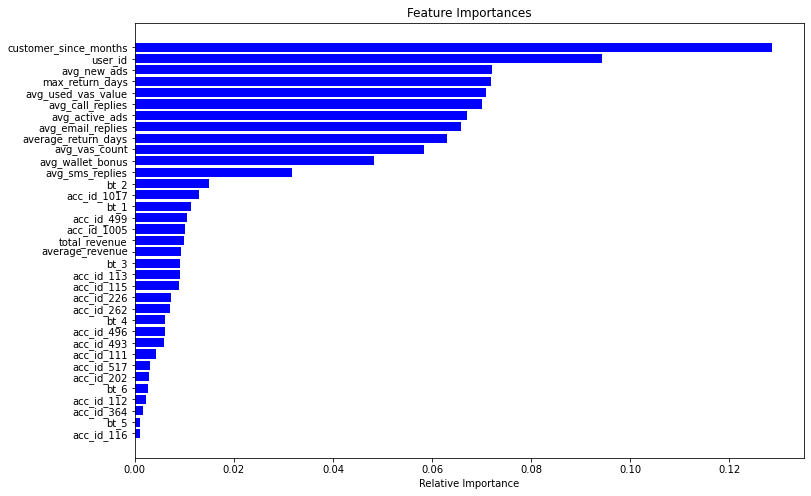

In [102]:
importances = classifier.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The above graph shows a plot that represents the most important features in our Random Forest model.
- We will keeo these in mind when exploring the SHAP and shapely values of this model.

__Individual SHAP plot__

- Similar to the above models, have chosen a random observation from our test split and analyzed it using SHAP.
- The below plots show us how our model has come to its conclusion and what features lead it to predict the outcome.

In [95]:
choosen_instance = X_test.iloc[[20]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

- We have once again chosen the 20th observation and we can see how the model made its prediction based on the different feature values.

In [103]:
choosen_instance = X_test.iloc[25]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

- Now we do the same for the 25th observation and see what features are responsible for the classification of the observation.

__Collective force plot__

- We will now look at a larger chunk of observations and analyze how different feature values pull our model to predict these observations in either class 0 or class 1.

In [63]:
shap_values = explainer.shap_values(X_test)

In [120]:
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test)

- This plot shows all the test observations based on their similarities.
- Hovering over an observation, we can see the feature values of that observation and also how they effected the models prediction.

__SHAP Summary Plot__

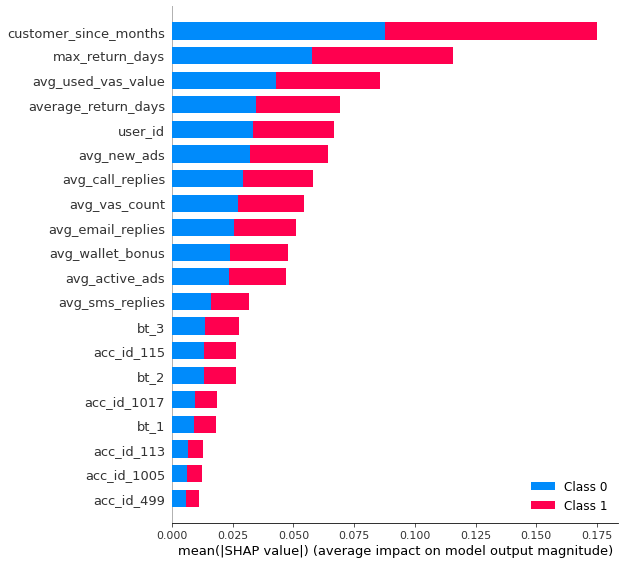

In [119]:
choosen_instance = X_test
shap_values = explainer.shap_values(choosen_instance)
shap.summary_plot(shap_values, X_train)

- Lastly, we will look at a summary plot with the mean impact of each feature on the models prediction based on our X_test data.
- As we can see, similar to our previous models, the customer_since_months still seems to be the most important feature in deciding the class of our observations just as we saw in the plot of important features.

___

<a id='section702'></a>
### 6.2 SVM Kernal Classifier

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, C=100)
classifier.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

- For our initial SVM model, we will choose an arbitrary value of __C__ and see how our model does. 
- After this, we will use grid search cross validation in order to optimize these parameters and see how it effects our performance.

In [40]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[805 166]
 [ 43 959]]


0.8940699442473391

- Our model without any optimization has yielded an accuracy of about 88.2%

__Applying GridSearchCV__

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.5, 1,  10, 100, 200, 500], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 2, 5, 10]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 98.92 %
Best Parameters: {'C': 500, 'gamma': 10, 'kernel': 'rbf'}


- From the grid search, it seems that our optimal value of __C is 100__ and __gamma is 0.7__.
- We will now retrain an SVM model with these parametric values and evaluate it again.

In [165]:
classifier = SVC(kernel = 'rbf', random_state = 0, C=500, gamma=10,probability=True)
classifier.fit(X_train, y_train)

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [166]:
svm_model = classifier

In [45]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 956   15]
 [   2 1000]]


0.9913836796756209

- After this tuning, we were able to get an accuracy of __99%__ from our SVM model.

__Understanding the models prediction process using SHAP and shapely values__

__Individual SHAP plot__

- We have chosen a random observation from our test split and analyzed it using SHAP.
- The below plots show us how our model has come to its conclusion and what features lead it to predict the outcome.

In [75]:
choosen_instance = X_test.iloc[[20]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

- In the above graph, we select a random observation, in this case the 20th observation, of our test split. We then explore the SHAP values.
- As we can see, the model splits a value of 6.23 and then shows us how each feature value impacts our model to make its final classification.
- We will do this for a few more individual observations before looking at multiple observations in groups.

In [73]:
choosen_instance = X_test.iloc[25]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

- In this case, we select the 25th observation and observe the SHAP values once again.
- We can see how much each feature value lends to the prediction of a particular class for this observation.

__Collective force plot__

- We will now look at a larger chunk of observations and analyze how different feature values pull our model to predict these observations in either class 0 or class 1.

In [50]:
explainer = shap.KernelExplainer(classifier.predict_proba, X_train[:100], link="logit")
shap_values = explainer.shap_values(X_test[:100], nsamples=100)

For simplicity and time constraints, we will only use 100 samples from the test and train splits as KernalExplainers take a very long time to train usually.

In [52]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

- Above we can see a large portion of our test split and see how each of the features pull the prediction in either direction i.e either towards __class 0__ or __class 1__.
- Note that due to the large training time, we only took the first __100__ observations and we have arranged our data in the original sampling order so we can see each observation and how much is twas pulled to either class.
- Hovering over the smaple in the plot will display the values of its features and whether they pulled the model to make a prediction of __class 1 (downwards)__ or __class 0 (upwards)__.

__SHAP Summary Plot__

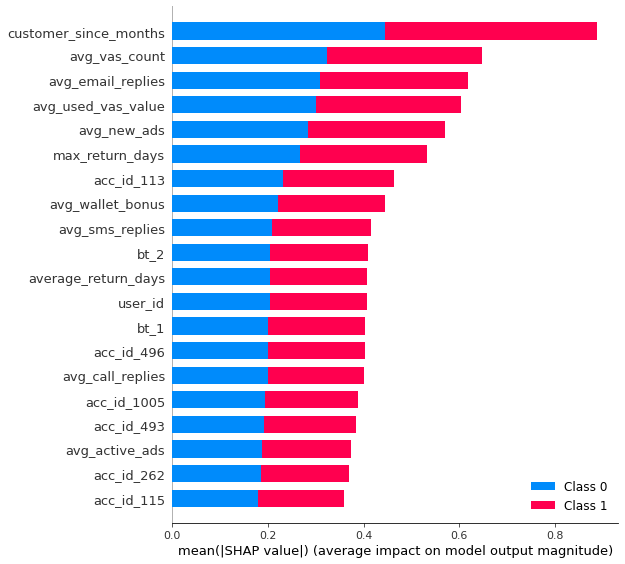

In [53]:
shap.summary_plot(shap_values, X_test)

- The summary plot shows the mean impact on our models output based on features. As we can see from the legend, class 0 is represented by blue and 1 by red. 
- The higher the impact on the output magnitude, the more important that features value is in predicting that particular class in our model.

___

<a id='section703'></a>
### 6.3 Deep Learning Classifier

In [105]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

- We create a DNN with the output layer having a sigmoid activation function.
- All the other layers have the relu activation function and are densely connected.

In [141]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=20)

- An early stopping mechanism is then created with validation loss as the monitored value and we attempt to minimize it.
- We put in place a patience level of 20 epochs.

In [142]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

- We then compile our model using the __adam__ optimizer and use accuracy as our performance metric.

In [143]:
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 16, epochs = 500,callbacks=[early_stop])

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

370/370 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7542 - val_loss: 0.4674 - val_accuracy: 0.7927
Epoch 2/500
370/370 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7794 - val_loss: 0.4160 - val_accuracy: 0.8099
Epoch 3/500
370/370 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.7986 - val_loss: 0.4010 - val_accuracy: 0.8135
Epoch 4/500
370/370 [==============================] - 0s 1ms/step - loss: 0.38

370/370 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9733 - val_loss: 0.1843 - val_accuracy: 0.9448
Epoch 54/500
370/370 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9770 - val_loss: 0.2139 - val_accuracy: 0.9478
Epoch 55/500
370/370 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9792 - val_loss: 0.1888 - val_accuracy: 0.9554
Epoch 56/500
370/370 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9772 - val_loss: 0.2033 - val_accuracy: 0.9463
Epoch 57/500
370/370 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9728 - val_loss: 0.1516 - val_accuracy: 0.9508
Epoch 58/500
370/370 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9816 - val_loss: 0.2535 - val_accuracy: 0.9336
Epoch 59/500
370/370 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9799 - val_loss: 0.3075 - val_accuracy: 0.9295
Epoch

- We train our DNN model with a batch size of 16 and we can initialize it with an arbitrarily high value of epochs since we have an early stopping mechanism implemented.

<AxesSubplot:>

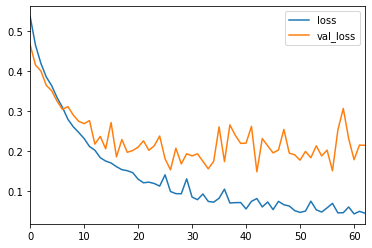

In [145]:
losses = pd.DataFrame(ann.history.history)
losses[['loss','val_loss']].plot()

- The above plot shows us the comparison of loss to validation loss with respect to time. Our objective is to make sure that the validation loss doesn't begin to rise as this could indicate overfitting to the data.
- As we can see, our model stops at around 60 epochs due to our early stopping mechanism.

In [146]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [147]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[888  83]
 [ 15 987]]


0.9503294475418145

- As we can see, we have been able to get an accuracy score of about __95%__ with the deep learning approach. Our other two models seem to have outperformed the DNN approach.
- This could be due to the fact that we do not have a large quantity of data entries. DNN methods would usually do better given larger datasets and since we already have acheived good accuracy with our other 2 models, we can simply move on to the next model without trying to optimize our NN further.

___

<a id='section704'></a>
### 6.4 XG Boost Classifier

In [157]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 904   67]
 [   2 1000]]


0.9650278763304613

- Out initial model gives us an accuracy score of about __96.5%__ without any sort of tuning.

In [161]:
param_grid = {
    'n_estimators': [100, 200, 300, 1000, 1200]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.21 %
Best Parameters: {'n_estimators': 300}


In [162]:
classifier = XGBClassifier(n_estimators=300)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- We see that __n_estimators=300__ seems the best choice and so we will retrain our model with the new parameter values.

In [163]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 916   55]
 [   2 1000]]


0.9711099847947289

- As we can see, after this change, we get an accuracy score of about __97%__. This still does not compare to our SVM and Random Forest accuracies.
- Due to this, we will not need to further explore this model with SHAP etc.

___

<a id='section8'></a>
## 7. Model Selection

- Out of all our models, the Random Forest model and the SVM model performed the best but the SVM model slightly outperformed the Random Forest Classifier model.
- For these reasons, we will choose the SVM model over the Random Forest Classifier.
- We can simply discard the XGB and DNN models in this case as they had sub-par performance when compared to the SVM.

In [169]:
pickle.dump(svm_model,open('svmmodel.pkl','wb'))

___

<a id='section9'></a>
## 8. Conclusion

- In this notebook, we used various libraries to do an Exploratory Data Analyis of the given dataset so that we could understand it better.
- We have made use of packages like pandas and seaborn to develop better insights about the data and checked to see if there were any missing values etc.
- Then we focused on engineering our features so that our models would be able to understand them more easily.
- The next step was to split our data into test and train splits in the ratio of 75/25 and add our engineered features to the training dataset.
- We then tried various different models on our dataset and evaluated their performances. We took a deeper look into the models that yielded high accuracy by using SHAP.
- This allowed us to look at how each feature value impacted a model to predict a certain class and gave us a better understanding of why and how our model made the predictions that it did.
- Lastly, we selected the model that gave us the best results which was the SVM model in our case and created a pickle file of this model so that it could easily be used in a Flask app etc.

___